In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

# batch 확인

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 3m 7s

In [ ]:
adata.obs['sample'].unique()

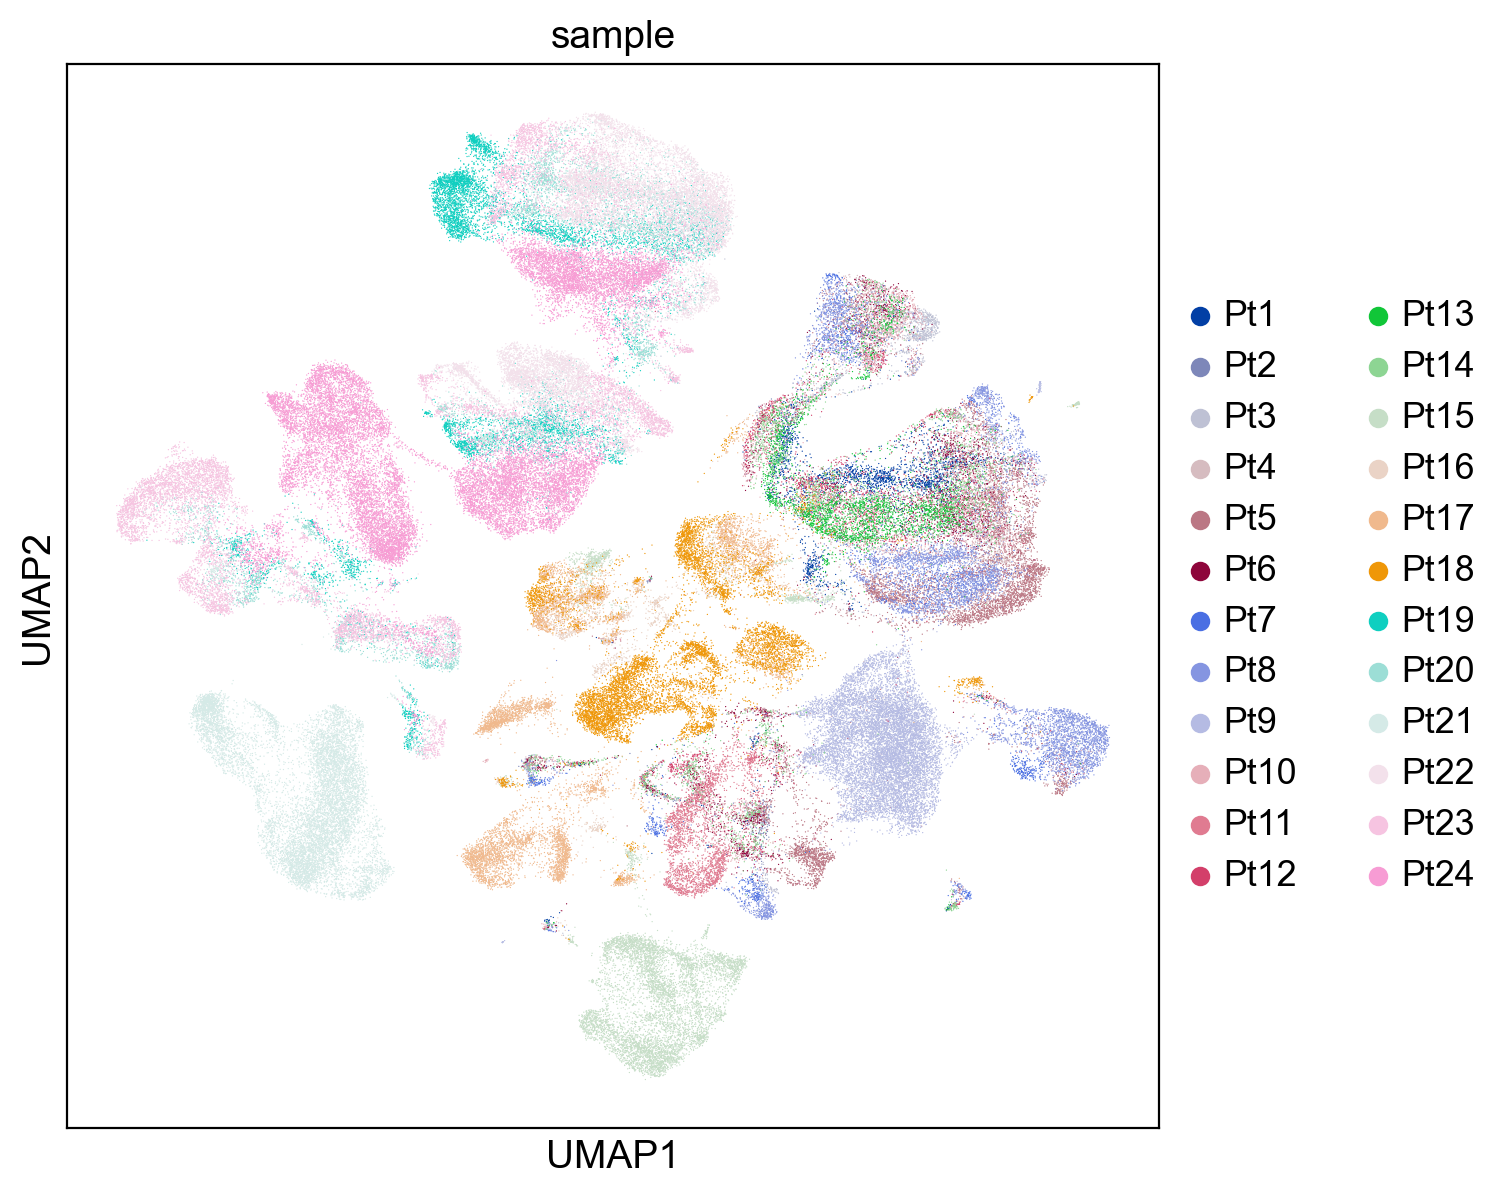

In [4]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample'
)

# batch correctino by BBKNN

In [ ]:
# sc.external.pp.bbknn(adata, batch_key = 'sample')
import bbknn

bbknn.bbknn(adata, batch_key = 'sample')

# running time:  39s

In [9]:
sc.tl.leiden(adata)
bbknn.ridge_regression(adata, batch_key=['sample'], confounder_key=['leiden'])
sc.tl.pca(adata)
bbknn.bbknn(adata)

C:\Users\heung\AppData\Local\Temp\ipykernel_87968\2334217344.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 2m 44s

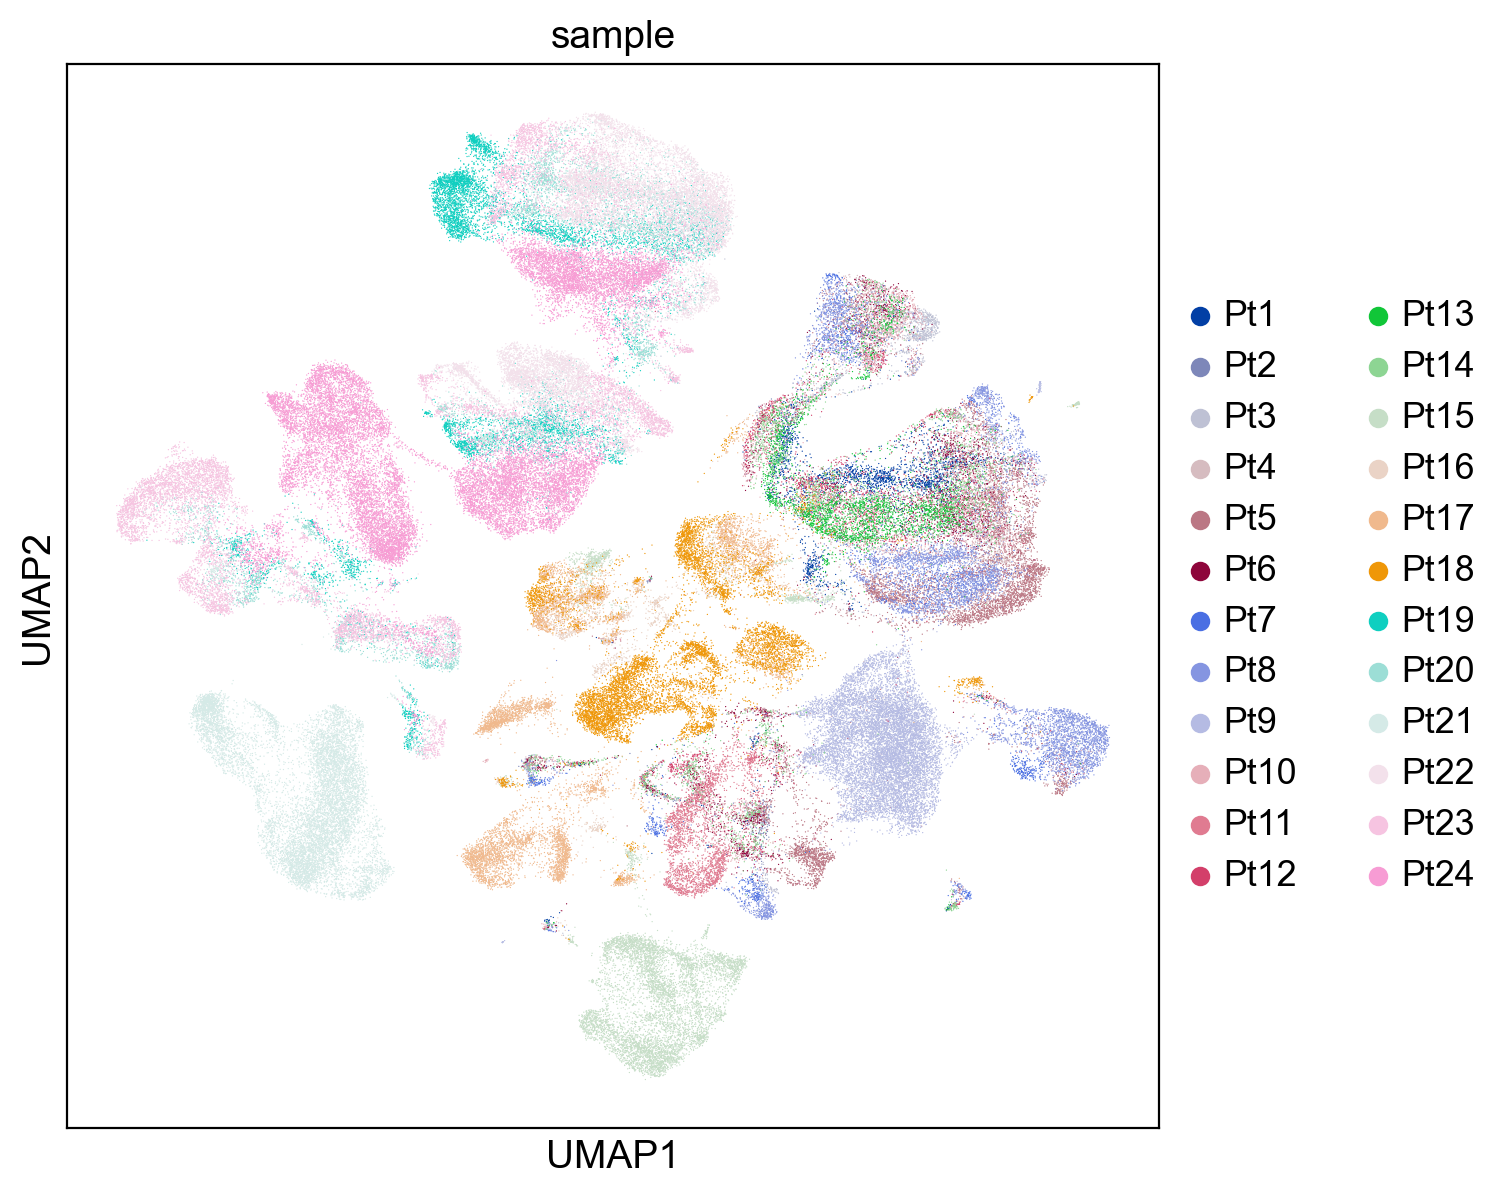

In [ ]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample',
)

> 된건지 잘 모르겠음.\
> 아예 차이가 없는 듯\
> 원본 논문에서도 normal에서는 microglia가 대부분이었는데 tumor 에서 macrophage, T cell 등 다양한 세포가 생긴다고 나와서 그렇게 틀린거 같진 않기도 하고?

# Save

In [ ]:
adata.write_h5ad(folder_path + "adata_BBKNN.h5ad")